In [1]:
import numpy as np
import control
import matplotlib.pyplot as plt

In [17]:
# Exemplo de Equacionamento da função de transferência discreta de sistemas
# malha fechada
# Slide 03

In [2]:
# Funções de Transferência Contínuas
G = control.tf(1,[1,1]);
H = control.tf(1,[1,0]);
print("G = \n",G)
print("H = \n",H)

G = 
 
  1
-----
s + 1

H = 
 
1
-
s



In [3]:
# Período de amostragem
T = 0.2;
# Funções de Transferência Discretas
Gz = control.c2d(G,T);
Hz = control.c2d(H,T);
GHz = control.c2d(G*H,T);
print("Gz = \n",Gz)
print("Hz = \n",Hz)
print("GHz = \n",GHz)

Gz = 
 
  0.1813
----------
z - 0.8187

dt = 0.2

Hz = 
 
 0.2
-----
z - 1

dt = 0.2

GHz = 
 
 0.01873 z + 0.01752
----------------------
z^2 - 1.819 z + 0.8187

dt = 0.2



1 states have been removed from the model
FTMFa = 
 
  0.1813 z - 0.1813
--------------------
z^2 - 1.8 z + 0.8363

dt = 0.2



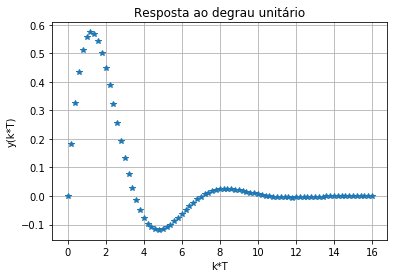

In [23]:
# Função de Transferência em malha fechada
# Caso a) medidor analógico
FTMFa = control.minreal(Gz/(1+GHz));     # não é possivel usar o comando feedback
print("FTMFa = \n",FTMFa)     

tfinal = 16;
Kmax = int(tfinal/T+1);
t = np.linspace(0, tfinal, Kmax)                        
x, y = control.step_response(FTMFa, t);
plt.figure()
plt.plot(x, y,'*')
plt.title("Resposta ao degrau unitário")
plt.xlabel("k*T")
plt.ylabel("y(k*T)")
plt.grid(True)
plt.show()


FTMFb = 
 
  0.1813 z - 0.1813
---------------------
z^2 - 1.819 z + 0.855

dt = 0.2



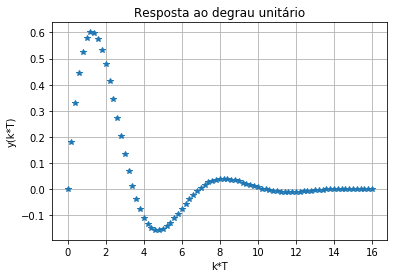

In [25]:
# Caso b) medidor digital
FTMFb = control.feedback(Gz,Hz);     
print("FTMFb = \n",FTMFb)     

tfinal = 16;
Kmax = int(tfinal/T+1);
t = np.linspace(0, tfinal, Kmax)                        
x, y = control.step_response(FTMFb, t);
plt.figure()
plt.plot(x, y,'*')
plt.title("Resposta ao degrau unitário")
plt.xlabel("k*T")
plt.ylabel("y(k*T)")
plt.grid(True)
plt.show()